## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import adfuller, acf, pacf

from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX 

from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Loading the Data

In [2]:
df = pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Overview

In [3]:
df.shape

(9994, 21)

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Performing EDA

In [8]:
# Separating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:            
        if df[column].nunique() < 50:      
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         

from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical    continuous
-------------  -------------
Ship Mode      Row ID
Segment        Order ID
Country        Order Date
State          Ship Date
Region         Customer ID
Category       Customer Name
Sub-Category   City
Quantity       Postal Code
Discount       Product ID
               Product Name
               Sales
               Profit


### Checking Correlation

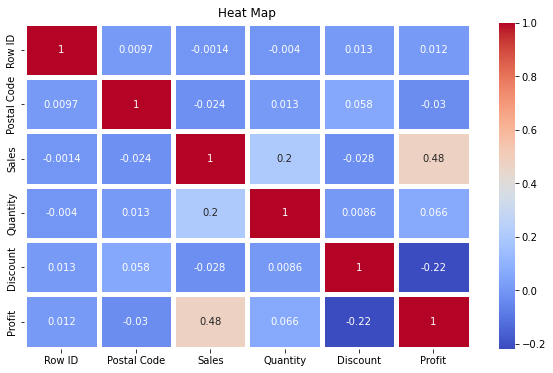

In [9]:
fig, ax=plt.subplots(figsize= (10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidth=5).set_title('Heat Map')
plt.show()

### Univariate Analysis

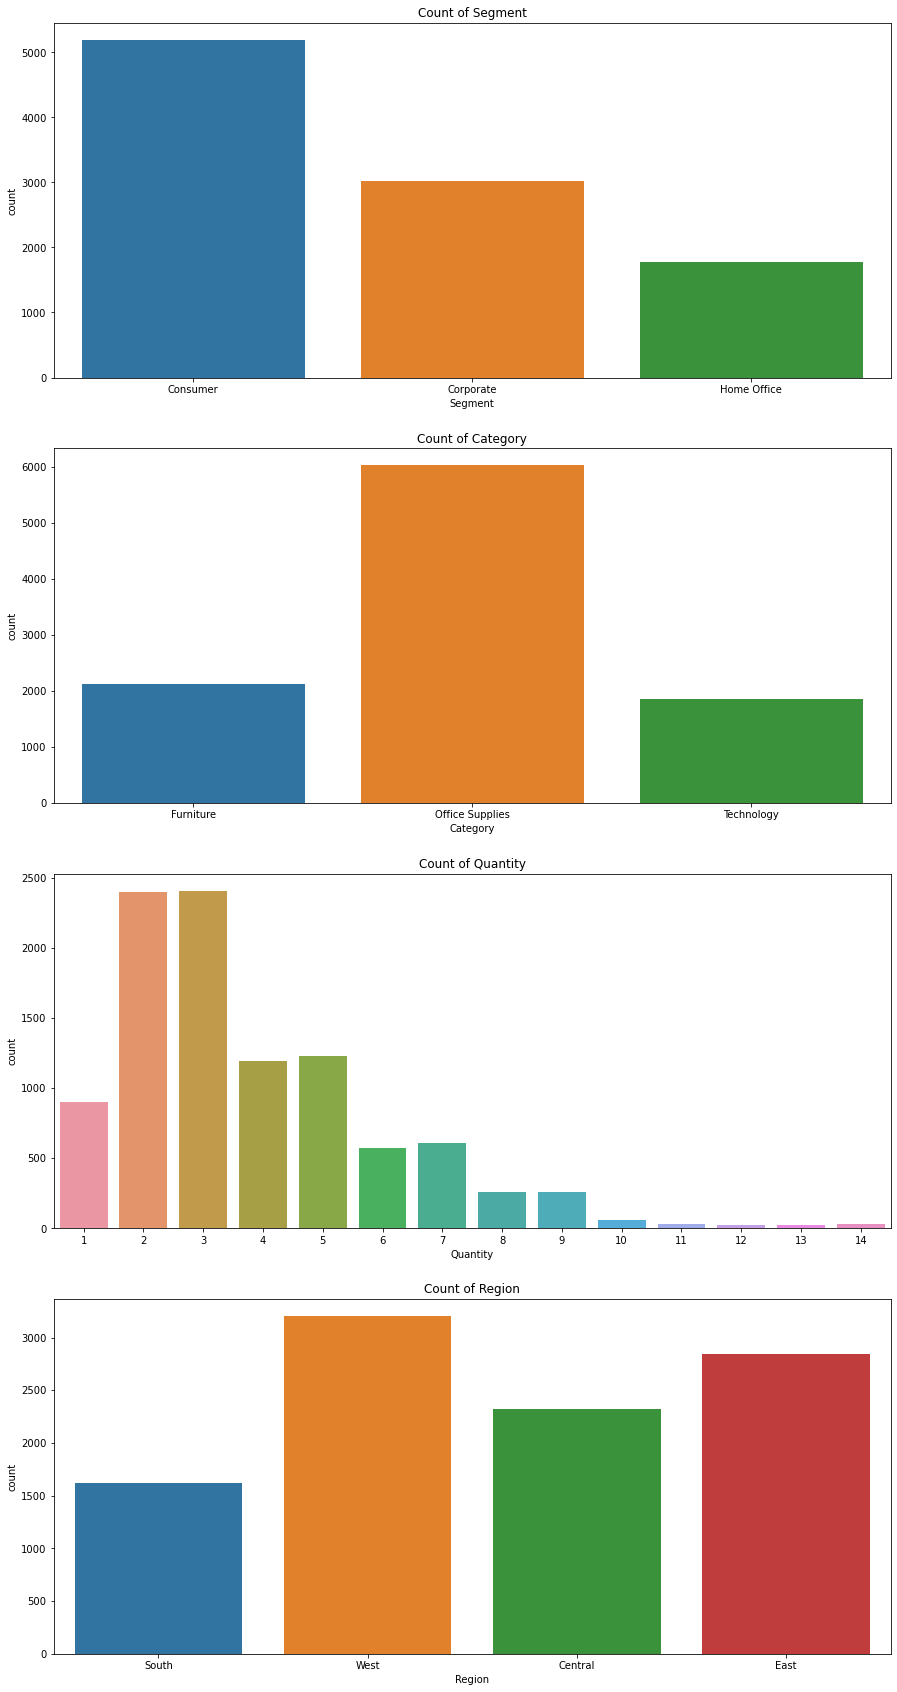

In [10]:
fig, ax = plt.subplots(4,1, figsize = (15,30))
ax[0].set_title("Count of Segment")
sns.countplot(x = df["Segment"], ax = ax[0])
ax[1].set_title("Count of Category")
sns.countplot(x = df["Category"], ax = ax[1])
ax[2].set_title("Count of Quantity")
sns.countplot(x = df["Quantity"], ax = ax[2])
ax[3].set_title("Count of Region")
sns.countplot(x = df["Region"], ax = ax[3])
plt.show()

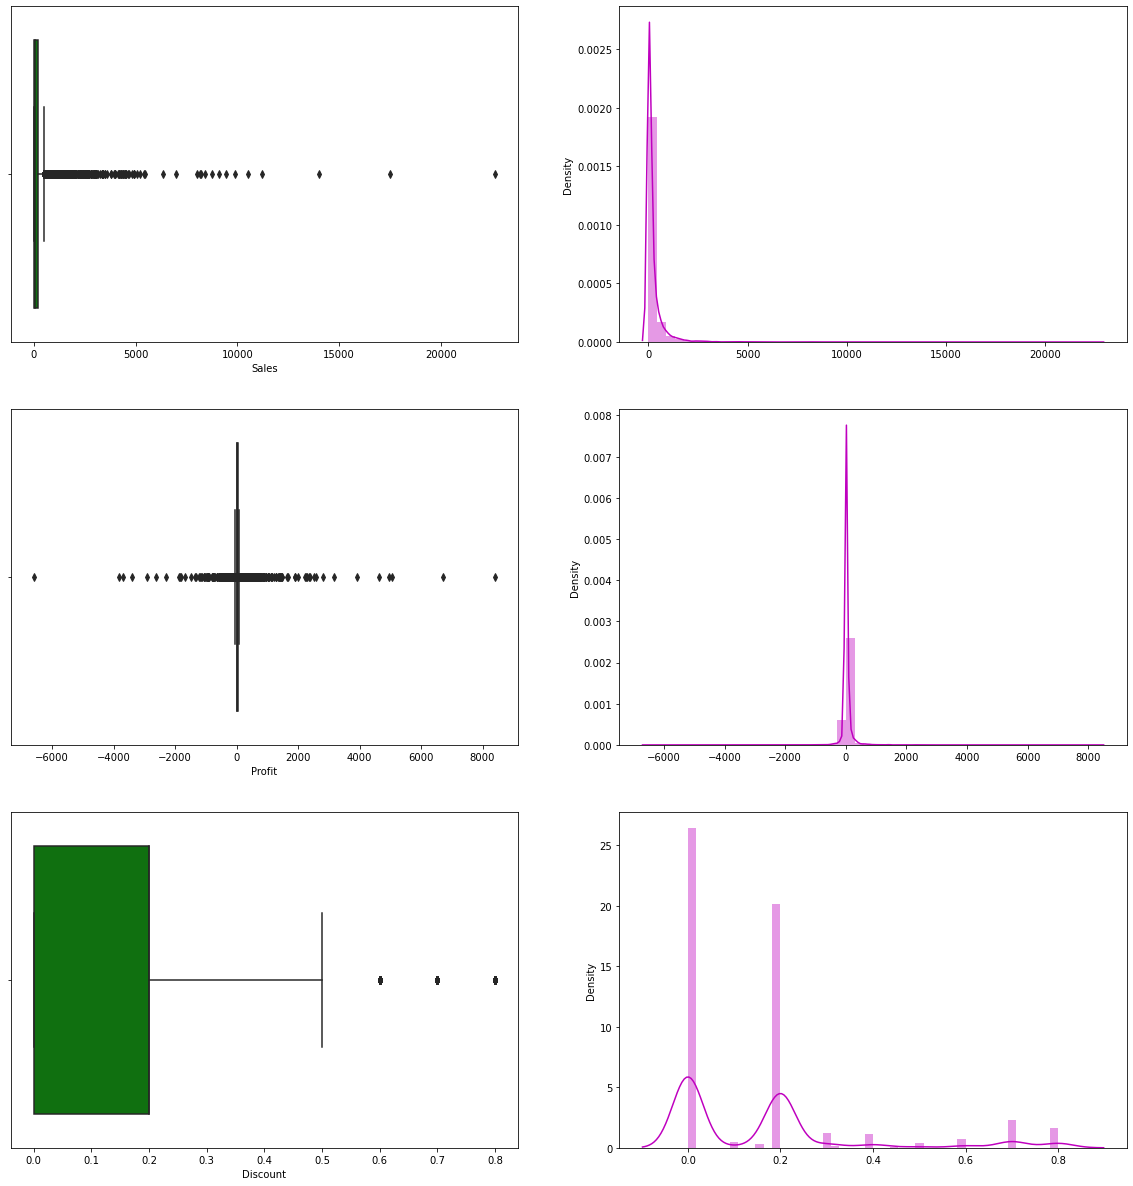

In [11]:
fig, ax = plt.subplots(3, 2, figsize= (20, 21))            
sns.distplot(x = df["Sales"], ax =ax[0,1], color = "m")
sns.boxplot(x = df["Sales"], ax = ax[0,0], color = "g")
sns.distplot(x = df["Profit"], ax =ax[1,1], color = "m")
sns.boxplot(x = df["Profit"], ax = ax[1,0], color = "g")
sns.distplot(x = df["Discount"], ax =ax[2,1], color = "m")
sns.boxplot(x = df["Discount"], ax = ax[2,0], color = "g")
plt.show()

### Bivariate Analysis

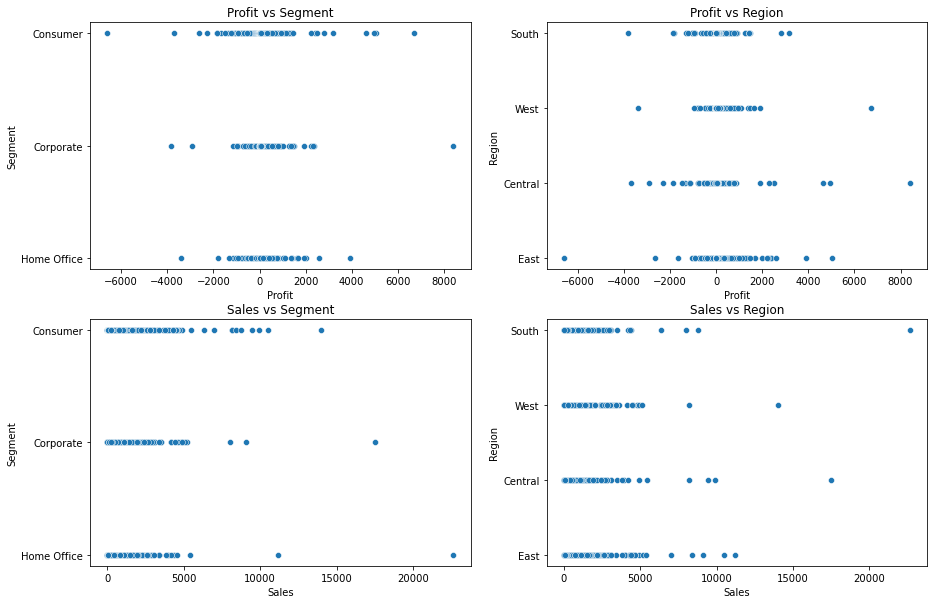

In [12]:
fig, ax=plt.subplots(2,2,figsize=(15,10))
sns.scatterplot(df['Profit'], df['Segment'], ax=ax[0,0])
ax[0,0].set_title('Profit vs Segment')
sns.scatterplot(x='Profit', y='Region', data=df, ax=ax[0,1])
ax[0,1].set_title('Profit vs Region')
sns.scatterplot(x='Sales', y='Segment', data=df, ax=ax[1,0])
ax[1,0].set_title('Sales vs Segment')
sns.scatterplot(x='Sales', y='Region', data=df, ax=ax[1,1])
ax[1,1].set_title('Sales vs Region')
plt.show()
plt.close()

## Data Preprocessing

In [13]:
# Setting order-date as in date_format
df['Order Date'] =  pd.to_datetime(df['Order Date'])

# Set date as an index
df.set_index('Order Date', inplace=True)

In [14]:
df = df.resample('M').sum()
print(df.shape)
df.head()

(48, 6)


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-31,346176,4342297,14236.895,284,10.00,2450.1907
2014-02-28,272235,3049775,4519.892,159,8.10,862.3084
2014-03-31,871575,8314538,55691.009,585,26.30,498.7299
2014-04-30,690625,7723827,28295.345,536,14.85,3488.8352
2014-05-31,611708,6497804,23648.287,466,18.95,2738.7096


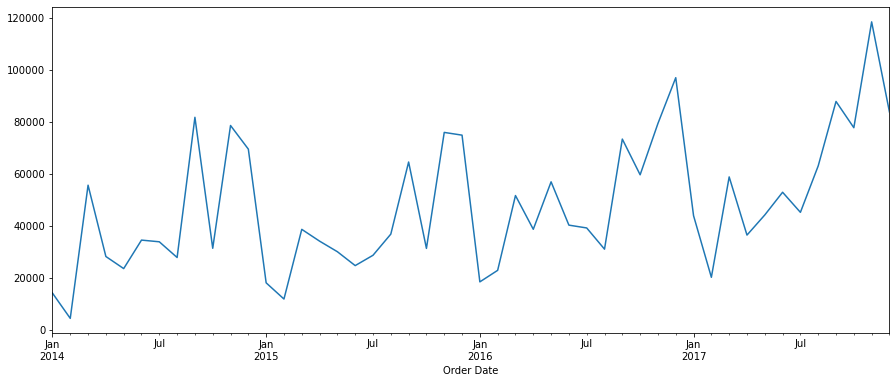

In [15]:
df['Sales'].plot(figsize=(15,6))
plt.show()

In [16]:
dfs = df['Sales']
dfs

Order Date
2014-01-31     14236.8950
2014-02-28      4519.8920
2014-03-31     55691.0090
2014-04-30     28295.3450
2014-05-31     23648.2870
2014-06-30     34595.1276
2014-07-31     33946.3930
2014-08-31     27909.4685
2014-09-30     81777.3508
2014-10-31     31453.3930
2014-11-30     78628.7167
2014-12-31     69545.6205
2015-01-31     18174.0756
2015-02-28     11951.4110
2015-03-31     38726.2520
2015-04-30     34195.2085
2015-05-31     30131.6865
2015-06-30     24797.2920
2015-07-31     28765.3250
2015-08-31     36898.3322
2015-09-30     64595.9180
2015-10-31     31404.9235
2015-11-30     75972.5635
2015-12-31     74919.5212
2016-01-31     18542.4910
2016-02-29     22978.8150
2016-03-31     51715.8750
2016-04-30     38750.0390
2016-05-31     56987.7280
2016-06-30     40344.5340
2016-07-31     39261.9630
2016-08-31     31115.3743
2016-09-30     73410.0249
2016-10-31     59687.7450
2016-11-30     79411.9658
2016-12-31     96999.0430
2017-01-31     43971.3740
2017-02-28     20301.1334
2

In [17]:
ss = int(0.7 * len(dfs))

train = dfs.iloc[:ss]
test = dfs.iloc[ss:]

print('Train : ',len(train), '\t Test : ',len(test))

Train :  33 	 Test :  15


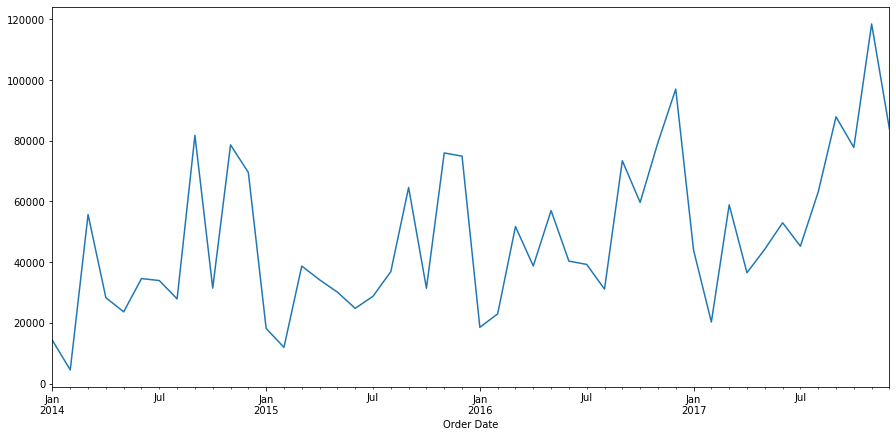

In [18]:
plt.figure(figsize=(15,7))
dfs.plot()
plt.show()

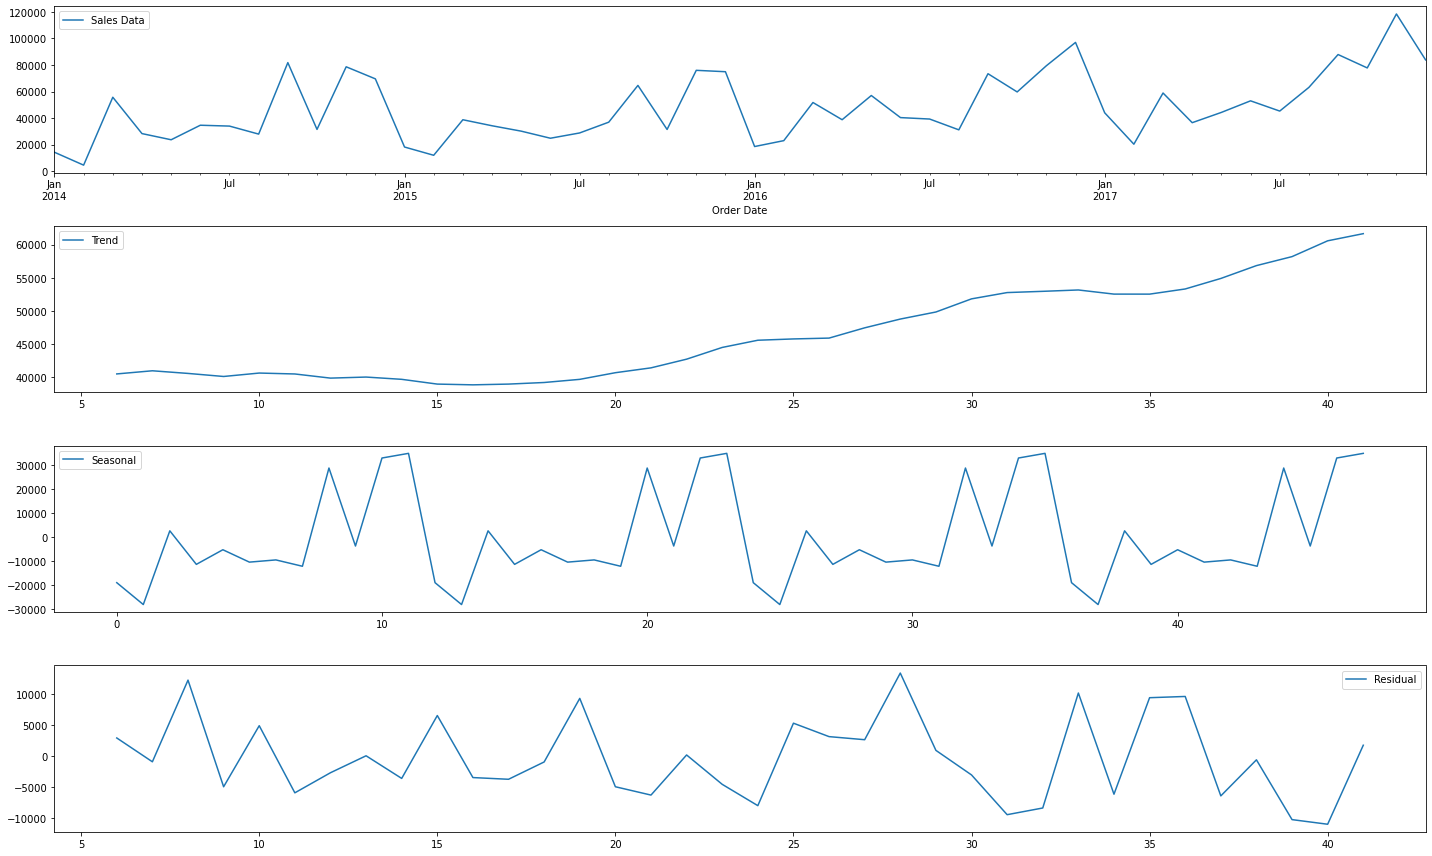

In [19]:
decomposition = seasonal_decompose(np.asarray(dfs), freq=12)

d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
dfs.plot(label='Sales Data')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

In [20]:
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    if pvalue < 0.05:
        msg = "pvalue={} Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={} Data is not Stationary. Make the data stationary before model building".format(pvalue)
    return msg

In [21]:
print(checkStationarity(train))

pvalue=0.0003416968790973095 Data is Stationary. Proceed to model building


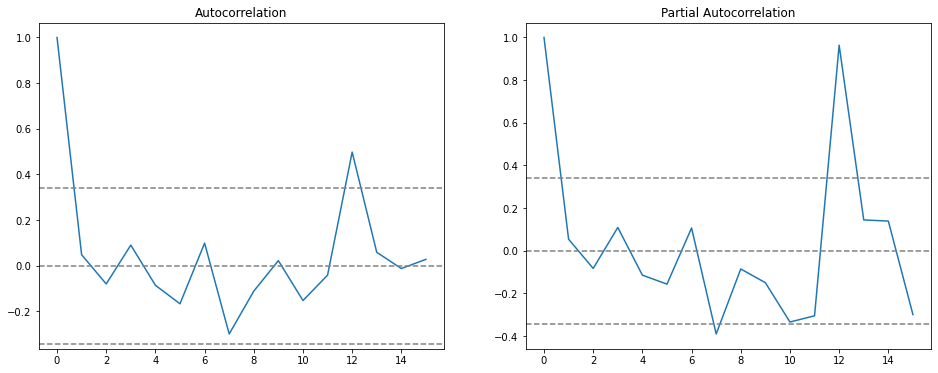

In [22]:
lag_pcf = acf(train, nlags=15)
lag_pacf = pacf(train, nlags=15, method='ols')

# For ACF

fig, ax = plt.subplots(figsize=(16,6))
plt.subplot(121)
plt.plot(lag_pcf)
plt.title('Autocorrelation')
plt.axhline(y= -1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y= 0 , linestyle='--', color='gray')
plt.axhline(y= 1.96/np.sqrt(len(train)), linestyle='--', color='gray')

# For PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.title('Partial Autocorrelation')
plt.axhline(y= -1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y= 0, linestyle='--', color='gray')
plt.axhline(y= 1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.show()

## Preparing Models

In [23]:
p=[1,2,3]; q=[1,2,3]
AIC=[]
for x in p:
    for y in q: 
        m1 = ARIMA(train, order=(x,0,y)).fit()
        print('for: p=',x,'and q=',y)
        print(m1.aic)
        AIC.append(m1.aic)
print(min(AIC))

for: p= 1 and q= 1
757.6146167631769
for: p= 1 and q= 2
759.4690737395327
for: p= 1 and q= 3
762.9852805782764
for: p= 2 and q= 1
759.3716953139376
for: p= 2 and q= 2
757.3576647931112
for: p= 2 and q= 3
758.5704112219025
for: p= 3 and q= 1
761.1224984206136
for: p= 3 and q= 2
758.9557699236286
for: p= 3 and q= 3
760.3010538571556
757.3576647931112


Here, p=1 and q=1 for ARMA model as it is giving minimum aic.

### ARIMA Model

In [24]:
p=4; q=3

m = ARIMA(train, order=(p,0,q)).fit()
print(m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(4, 0, 3)   Log Likelihood                -370.180
Date:                Wed, 25 May 2022   AIC                            758.360
Time:                        00:01:20   BIC                            771.828
Sample:                    01-31-2014   HQIC                           762.892
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.024e+04   1576.002     25.532      0.000    3.72e+04    4.33e+04
ar.L1          0.1138      0.334      0.340      0.734      -0.542       0.769
ar.L2         -0.1814      0.227     -0.800      0.4

In [25]:
strt = len(train)
end = len(train) + len(test) - 1

print('Start : ',strt,'End : ',end)

prediction = m.predict(strt, end)
prediction

Start :  33 End :  47


2016-10-31    27518.599283
2016-11-30    34545.981263
2016-12-31    43082.967691
2017-01-31    20531.501558
2017-02-28    37346.995954
2017-03-31    47612.992858
2017-04-30    25335.005109
2017-05-31    41603.099128
2017-06-30    49800.572894
2017-07-31    27016.101375
2017-08-31    43084.355648
2017-09-30    49928.675312
2017-10-31    27330.402806
2017-11-30    43680.789106
2017-12-31    49539.675393
Freq: M, Name: predicted_mean, dtype: float64

In [26]:
pvalue = sm.stats.acorr_ljungbox(m.resid, lags=[1], return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [27]:
actual=[]; pred=[]

for i in range(len(prediction)):
    actual.append(test[i])
    pred.append(prediction.iloc[i])

dfs1 = pd.DataFrame({'Actual':actual, 'Predicted':pred})
dfs1['Error'] = dfs1['Actual'] - dfs1['Predicted']
dfs1

,Actual,Predicted,Error
0,59687.7450,27518.599283,32169.145717
1,79411.9658,34545.981263,44865.984537
2,96999.0430,43082.967691,53916.075309
3,43971.3740,20531.501558,23439.872442
4,20301.1334,37346.995954,-17045.862554
5,58872.3528,47612.992858,11259.359942
6,36521.5361,25335.005109,11186.530991
7,44261.1102,41603.099128,2658.011072
8,52981.7257,49800.572894,3181.152806
9,45264.4160,27016.101375,18248.314625


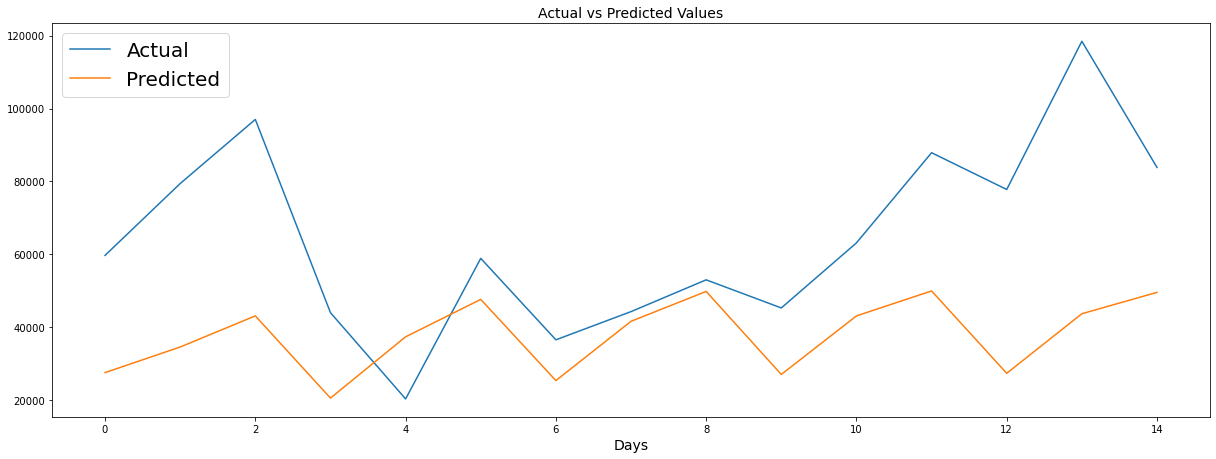

In [28]:
plt.subplots(figsize=(17,6))
plt.plot(dfs1.Actual, label='Actual')  
plt.plot(dfs1.Predicted, label='Predicted')
plt.tight_layout()
plt.legend(fontsize=20)
plt.xlabel('Days', fontsize=14)
plt.title('Actual vs Predicted Values', fontsize=14)
plt.show()

In [29]:
fcast1 = m.predict(start=len(df), end=len(df)+11, typ='levels')
print(fcast1)

2018-01-31    27378.927034
2018-02-28    44114.219673
2018-03-31    49076.942895
2018-04-30    27416.497383
2018-05-31    44522.755477
2018-06-30    48611.040659
2018-07-31    27474.570123
2018-08-31    44918.553280
2018-09-30    48145.900639
2018-10-31    27552.034820
2018-11-30    45299.612481
2018-12-31    47680.452731
Freq: M, Name: predicted_mean, dtype: float64


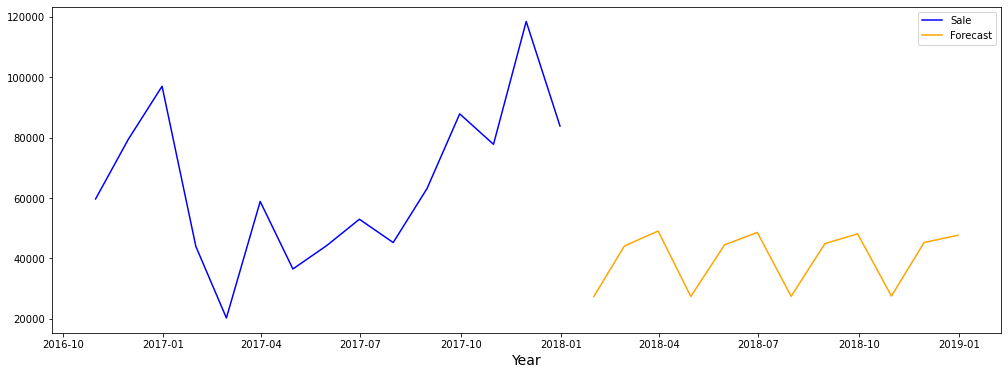

In [30]:
plt.subplots(figsize=(17,6))
# plt.plot(df1, color='skyblue', label='Sale')
plt.plot(test, color='blue', label='Sale')
# test.plot(figsize=(10,8),legend=True)
plt.plot(fcast1, color='orange', label='Forecast')
plt.legend()
plt.xlabel('Year', fontsize=14)
plt.show()

### SARIMA Model

In [31]:
p=2; q=2; d=2

m1 = sm.tsa.statespace.SARIMAX(dfs, order=(p,d,q), seasonal_order=(p,d,q,12)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(2, 2, 2)x(2, 2, 2, 12)   Log Likelihood                -249.651
Date:                            Wed, 25 May 2022   AIC                            517.303
Time:                                    00:01:22   BIC                            527.122
Sample:                                01-31-2014   HQIC                           519.616
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3268      0.638     -2.080      0.037      -2.577      -0.077
ar.L2         -0.8409      0.919     -0.915      0.360      -2.643       0.961
ma.L1         -0.2281      1.037     -0.220      0.826      -2.260       1.804
ma.L2         -0.6778      0.731     -0.927      0.354      -2.110       0.755
ar.S.L12      -0.7895    617.144     -0.001      0.999   -1210.370    1208.791
ar.S.L24       0.0126     73.356      0.000      1.000    -143.762     143.788
ma.S.L12       0.2576    623.601      0.000      1.000   -1221.977    1222.492
ma.S.L24      -0.3914    250.654     -0.002      0.999    -491.664     490.881
sigma2      7.594e+08      0.001   1.43e+12      0.000    7.59e+08    7.59e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.25
Prob(Q):                              0.88   Prob(JB):                         0.88
Heteroskedasticity (H):               2.49   Skew:                             0.26
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.26e+29. Standard errors may be unstable.
"""

In [32]:
start = len(train)
end = len(train) + len(test) - 1

print('Start : ',start,'\t End : ',end)

prediction1 = m1.predict(start, end)
prediction1

Start :  33 	 End :  47


Order Date
2016-10-31     33993.136364
2016-11-30     90605.833549
2016-12-31     99057.369054
2017-01-31     26723.564222
2017-02-28     18937.400751
2017-03-31     73833.226242
2017-04-30     48382.067511
2017-05-31     57743.277626
2017-06-30     40602.204134
2017-07-31     28138.089929
2017-08-31     22147.513163
2017-09-30    106518.853826
2017-10-31     76961.291456
2017-11-30    118623.978696
2017-12-31    115074.995340
Freq: M, Name: predicted_mean, dtype: float64

In [33]:
actual=[]; pred=[]

for i in range(len(prediction1)):
    actual.append(test[i])
    pred.append(prediction1[i])

dfs2 = pd.DataFrame({'Actual':actual, 'Predicted':pred})
dfs2['Error'] = dfs2['Actual'] - dfs2['Predicted']
dfs2

,Actual,Predicted,Error
0,59687.7450,33993.136364,25694.608636
1,79411.9658,90605.833549,-11193.867749
2,96999.0430,99057.369054,-2058.326054
3,43971.3740,26723.564222,17247.809778
4,20301.1334,18937.400751,1363.732649
5,58872.3528,73833.226242,-14960.873442
6,36521.5361,48382.067511,-11860.531411
7,44261.1102,57743.277626,-13482.167426
8,52981.7257,40602.204134,12379.521566
9,45264.4160,28138.089929,17126.326071


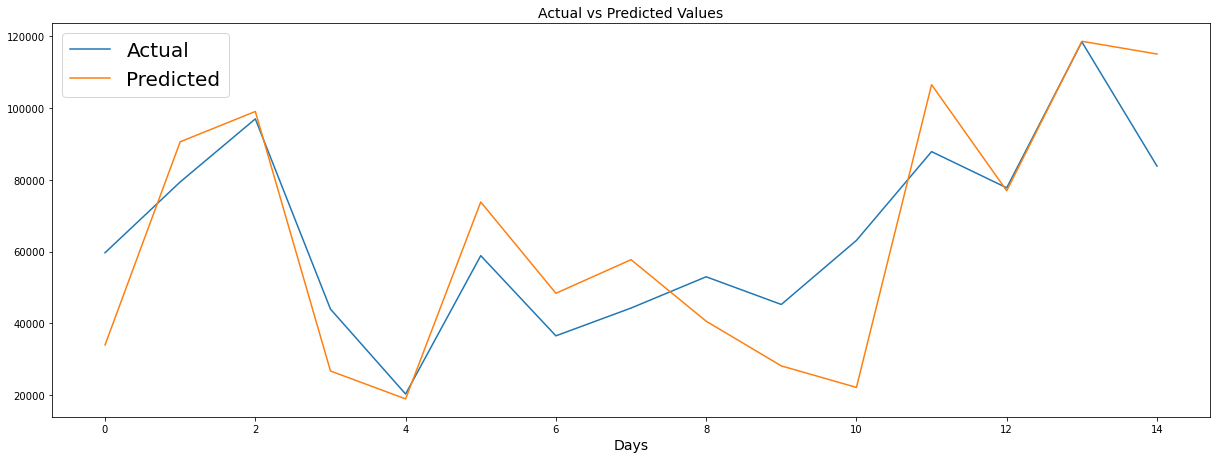

In [34]:
plt.subplots(figsize=(17,6))
plt.plot(dfs2.Actual, label='Actual')  
plt.plot(dfs2.Predicted, label='Predicted')
plt.tight_layout()
plt.legend(fontsize=20)
plt.xlabel('Days', fontsize=14)
plt.title('Actual vs Predicted Values', fontsize=14)
plt.show()

In [35]:
fcast = m1.predict(start=len(dfs), end=len(dfs)+11, typ='levels')
print(fcast)

2018-01-31     62603.357797
2018-02-28     30538.846680
2018-03-31     41727.462587
2018-04-30     55647.182586
2018-05-31     35130.932912
2018-06-30     53104.142194
2018-07-31     63203.970475
2018-08-31     57886.434081
2018-09-30    103583.143912
2018-10-31     93631.852723
2018-11-30    127010.155888
2018-12-31     94651.797111
Freq: M, Name: predicted_mean, dtype: float64


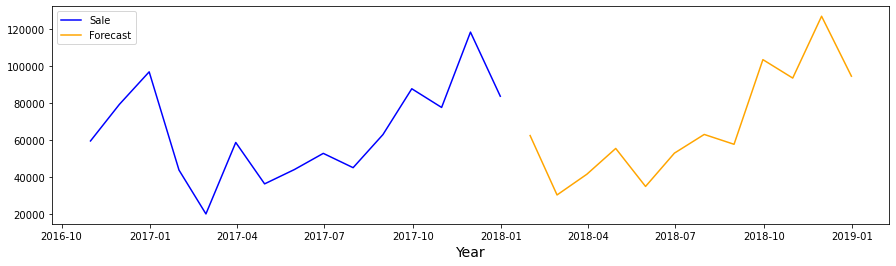

In [36]:
plt.subplots(figsize=(15,4))
plt.plot(test, color='blue', label='Sale')
plt.plot(fcast, color='orange', label='Forecast')
plt.legend()
plt.xlabel('Year', fontsize=14)
plt.show()

## Conclusion:

## As per model evaluation, SARIMA model is giving best forecasting results for Furniture Sales. 